```{contents}
```

# Linear Regression

**Simple linear regression** is a **supervised machine learning technique** for regression tasks. It uses a dataset with known inputs and outputs to learn a model that predicts a continuous value for new inputs.

---

## Core Idea

The goal is to find a **best-fit line** through the data that minimizes the error between predictions and actual values. This line shows the relationship between:

* **Independent variable (x)** → input feature (e.g., weight)
* **Dependent variable (y)** → output (e.g., height)

---

## Hypothesis Function

The prediction is represented by a linear equation:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

* $x$: input feature
* $h_\theta(x)$: predicted output
* $\theta_0$: intercept (value when $x=0$)
* $\theta_1$: slope (how much $y$ changes when $x$ increases by 1)

Training means finding the best values of $\theta_0$ and $\theta_1$.

---

## Cost Function (Error Measurement)

To measure fit, we use the **Mean Squared Error (MSE)**:

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2
$$

* $m$: number of data points
* $x^{(i)}, y^{(i)}$: i-th input and true output
* Squared error ensures all errors are positive and penalizes large deviations

**Objective**: minimize $J(\theta_0, \theta_1)$.

---

## Gradient Descent (Optimization)

To minimize the cost function, we use **gradient descent**. It iteratively adjusts parameters in the direction that reduces error:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)
$$

* $\alpha$: learning rate (step size)
* $\frac{\partial}{\partial \theta_j} J$: derivative (slope) of the cost function w\.r.t. parameter $\theta_j$

---

## Update Rules

By expanding the derivatives, we get:

* Intercept update:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$$

* Slope update:

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \big(h_\theta(x^{(i)}) - y^{(i)}\big) \cdot x^{(i)}
$$

These updates repeat until convergence at the **global minimum** of the cost function, giving the best-fit line.


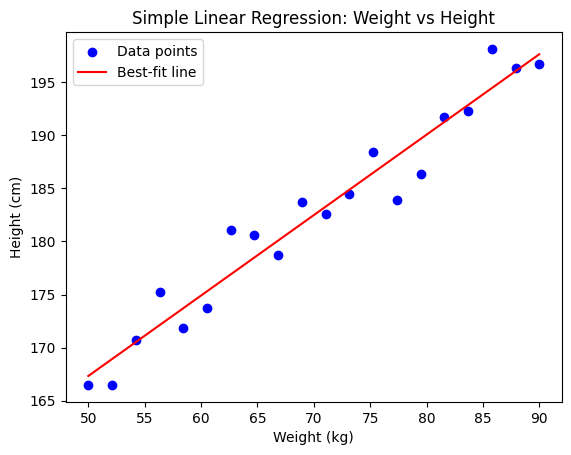

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample dataset (weight vs height)
np.random.seed(42)
weights = np.linspace(50, 90, 20)   # weights (kg)
heights = 0.9 * weights + 120 + np.random.randn(20) * 3  # linear relation with noise

# Scatter plot of dataset
plt.scatter(weights, heights, color="blue", label="Data points")

# Linear Regression using closed-form solution (Normal Equation)
X = np.c_[np.ones(weights.shape[0]), weights]  # add bias term
theta_best = np.linalg.inv(X.T @ X) @ X.T @ heights  # (X^T X)^-1 X^T y

# Predicted line
line_x = np.linspace(50, 90, 100)
line_y = theta_best[0] + theta_best[1] * line_x

plt.plot(line_x, line_y, color="red", label="Best-fit line")

# Labels
plt.title("Simple Linear Regression: Weight vs Height")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

plt.legend()
plt.show()


## Assumptions

Linear regression looks deceptively simple—fit a straight line, done! But under the hood, it quietly relies on a handful of **assumptions** to make sure its estimates are valid and its statistical tests (like p-values, R²) make sense.

Here are the key assumptions:

---

### 1. **Linearity**

The relationship between predictors $X$ and the response $y$ is **linear in parameters**.

$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p + \epsilon
$$

* The effect of each predictor is additive and proportional.
* If reality is curved, the straight-line model is misspecified.

---

### 2. **Independence of Errors**

The residuals (errors) should be independent of each other.

* No autocorrelation (common problem in time series).
* If one error predicts the next, the estimates are misleading.

---

### 3. **Homoscedasticity (Constant Variance of Errors)**

The variance of residuals is the same across all levels of predictors.

* In plots: residuals should look like a random “cloud,” not a funnel (widening/narrowing spread).

---

### 4. **Normality of Errors**

Residuals should be normally distributed (especially important for hypothesis testing and confidence intervals).

* The line can still fit without this, but statistical inference becomes unreliable.

---

### 5. **No (or little) Multicollinearity**

Predictors should not be highly correlated with each other.

* If they are, coefficients $\beta$ become unstable and hard to interpret.
* Variance Inflation Factor (VIF) is often used to check this.

---

### 6. **No Endogeneity (Exogeneity of Predictors)**

Predictors $X$ should be independent of the error term $\epsilon$.

* If a predictor is correlated with errors, the coefficients are biased.
* Classic example: omitted variable bias.

---

### 7. **Measurement Accuracy**

Predictors should be measured without error.

* In practice, small measurement error is tolerable, but large ones distort results.


# 🔧 Workflow of Regression Models

## Simple Linear Regression

📌 Relationship between **one independent variable (x)** and **one dependent variable (y)**.

### Workflow:

1. **Define Model**:

   $$
   y = \beta_0 + \beta_1 x + \epsilon
   $$
2. **Assumptions Check**: Linearity, homoscedasticity, independence, normality of residuals.
3. **Cost Function**:
   Minimize MSE:

   $$
   J(\beta) = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
   $$
4. **Optimization**: Estimate parameters ($\beta_0, \beta_1$) using OLS (Ordinary Least Squares) or Gradient Descent.
5. **Train Model**: Fit line to data.
6. **Validation**: Check residual plots, R², RMSE.
7. **Prediction**: Use the line for new $x$ values.

---

## Multiple Linear Regression

📌 Relationship between **multiple independent variables (x₁, x₂, …, xₚ)** and one dependent variable (y).

### Workflow:

1. **Define Model**:

   $$
   y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon
   $$
2. **Assumptions Check**: Same as linear regression + check multicollinearity.
3. **Cost Function**:

   $$
   J(\beta) = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
   $$
4. **Optimization**: Solve for coefficients using matrix form:

   $$
   \hat{\beta} = (X^TX)^{-1}X^Ty
   $$
5. **Train Model**: Fit plane/hyperplane in feature space.
6. **Validation**: Use adjusted R², cross-validation, VIF (for multicollinearity).
7. **Prediction**: Predict $y$ given multiple $x$’s.

---

## Polynomial Regression

📌 Extends linear regression by adding polynomial terms (captures non-linear relationships).

### Workflow:

1. **Transform Features**: Create polynomial features (e.g., $x^2, x^3, …$).
   Example:

   $$
   y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon
   $$
2. **Assumptions Check**: Still linear in coefficients but beware of overfitting.
3. **Cost Function**:
   Same MSE as before.
4. **Optimization**: Use OLS or gradient descent to solve for $\beta$.
5. **Train Model**: Fit polynomial curve.
6. **Validation**: Use CV to avoid overfitting, check residual plots.
7. **Prediction**: Use polynomial curve for predictions.

---

## Key Differences in Workflows

* **Linear** → single predictor, straight line fit.
* **Multiple Linear** → multiple predictors, hyperplane fit.
* **Polynomial** → transformed features, curve fitting (but still linear in parameters).



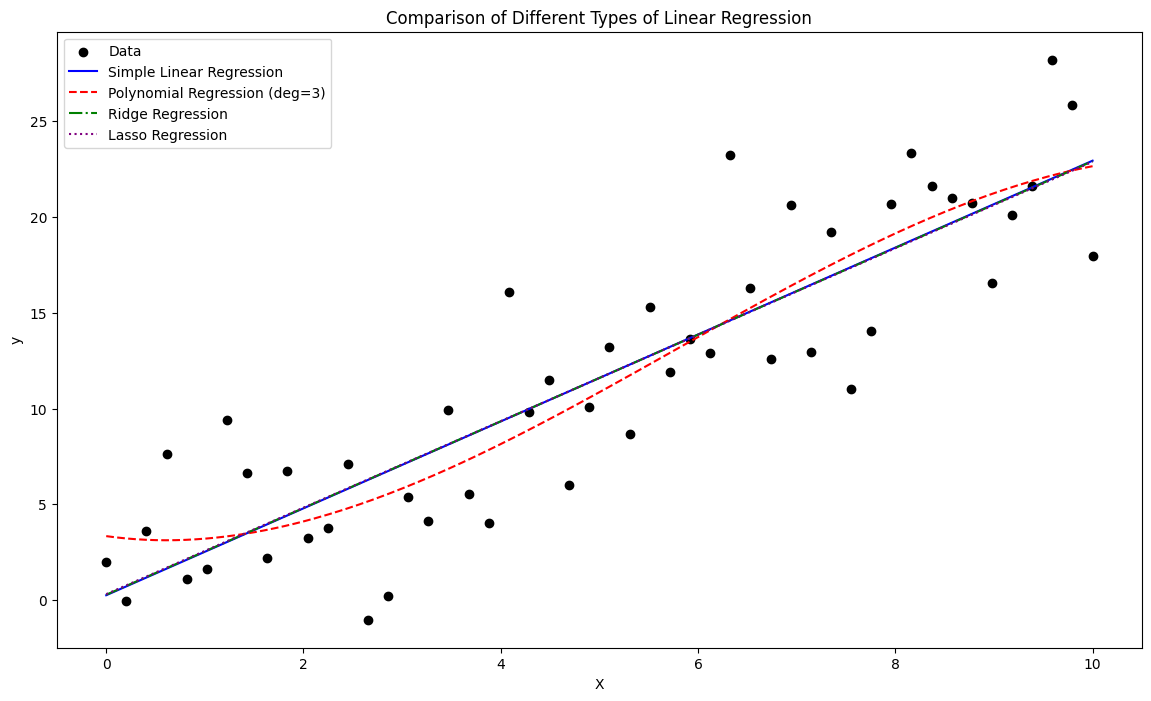

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2.5 * X.flatten() + np.random.normal(0, 4, size=50)

# Models
lin_reg = LinearRegression().fit(X, y)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression().fit(X_poly, y)

ridge_reg = Ridge(alpha=1.0).fit(X, y)
lasso_reg = Lasso(alpha=0.1).fit(X, y)

# Predictions
x_range = np.linspace(0, 10, 200).reshape(-1, 1)
y_lin = lin_reg.predict(x_range)
y_poly = poly_reg.predict(poly.transform(x_range))
y_ridge = ridge_reg.predict(x_range)
y_lasso = lasso_reg.predict(x_range)

# Plot
plt.figure(figsize=(14, 8))

plt.scatter(X, y, color="black", label="Data")

plt.plot(x_range, y_lin, color="blue", label="Simple Linear Regression")
plt.plot(x_range, y_poly, color="red", linestyle="--", label="Polynomial Regression (deg=3)")
plt.plot(x_range, y_ridge, color="green", linestyle="-.", label="Ridge Regression")
plt.plot(x_range, y_lasso, color="purple", linestyle=":", label="Lasso Regression")

plt.title("Comparison of Different Types of Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
